In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import calendar
import seaborn as sns

In [34]:
#importer la table transactions à partir d'un fichier CSV
address_trans = 'C:/Users/Oscar Gomez/Desktop/Data Analyst/P4/transactions.csv'
transactions = pd.DataFrame(pd.read_csv(address_trans, parse_dates=[1]))
transactions.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [35]:
len(transactions)

337016

In [3]:
#rechercher des valeurs nulles (manquantes) dans le dataframe
transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [4]:
print('Au total, {} clients différents apparaissent dans les transactions'.format(len(transactions.client_id.unique())))
print('Au total, {} sessions uniques ont été enregistrées au cours de la période d\'étude.'.format(len(transactions.session_id.unique())))

Au total, 8602 clients différents apparaissent dans les transactions
Au total, 169195 sessions uniques ont été enregistrées au cours de la période d'étude.


In [36]:
#importer la table cleints à partir d'un fichier CSV
address_clients = 'C:/Users/Oscar Gomez/Desktop/Data Analyst/P4/customers.csv'
clients = pd.DataFrame(pd.read_csv(address_clients))
clients.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [37]:
len(clients)

8623

In [6]:
#rechercher des valeurs nulles (manquantes) dans le dataframe
clients.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [7]:
#transactions sont datées jusqu'a 2022, donc l'âge est 2022 - l'année de naissance
clients['age'] = 2022-clients['birth']
clients.head()

,client_id,sex,birth,age
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79


In [8]:
#Analyse préliminaire de l'âge des clients à la recherche d'incohérences
clients.age.describe()

count    8623.000000
mean       43.719123
std        16.919535
min        18.000000
25%        30.000000
50%        43.000000
75%        56.000000
max        93.000000
Name: age, dtype: float64

In [38]:
#importer la table products à partir d'un fichier CSV
address_prod = 'C:/Users/Oscar Gomez/Desktop/Data Analyst/P4/products.csv'
products = pd.DataFrame(pd.read_csv(address_prod))
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [39]:
len(products)

3287

In [10]:
#rechercher des valeurs nulles (manquantes) dans le dataframe
products.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [11]:
#Analyse préliminaire du prix des clients à la recherche d'incohérences
products.price.describe()

count    3287.000000
mean       21.856641
std        29.847908
min        -1.000000
25%         6.990000
50%        13.060000
75%        22.990000
max       300.000000
Name: price, dtype: float64

In [12]:
#Il y a un produit avec un prix négatif
#Recherche dans la base de transactions
products[products['price']==-1]

,id_prod,price,categ
731,T_0,-1.0,0


In [13]:
transactions[transactions['id_prod']=='T_0']

,id_prod,date,session_id,client_id
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1
...,...,...,...,...
332594,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_0
332705,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1
332730,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1
333442,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1


In [14]:
#T_0 c'est a produit test. Nous retirons ce produit de la base de données
transactions = transactions.drop(transactions[transactions['id_prod']=='T_0'].index)
products = products.drop(products[products['id_prod']=='T_0'].index)
products.price.describe()

count    3286.000000
mean       21.863597
std        29.849786
min         0.620000
25%         6.990000
50%        13.075000
75%        22.990000
max       300.000000
Name: price, dtype: float64

In [15]:
#pour savoir si tous les produits dans les transactions ont leur fiche produit
transactions.loc[~transactions['id_prod'].isin(products.id_prod.unique())]

,id_prod,date,session_id,client_id
6235,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533
10802,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954
14051,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120
17486,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964
21078,0_2245,2021-03-01 00:09:29.301897,s_3,c_580
...,...,...,...,...
322710,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167
329417,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790
330490,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189
335531,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595


In [16]:
#103 transactions d'un produit sans description <0,05%. Les transactions sont supprimées.
transactions = transactions.drop(transactions[transactions['id_prod']=='0_2245'].index)

In [17]:
#convertir la colonne "date" en datetime
datetimes = pd.to_datetime(transactions["date"]) 
transactions["date"] = datetimes
transactions.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [18]:
transactions.describe()

<ipython-input-18-8d0677f1e5b2>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transactions.describe()


,id_prod,date,session_id,client_id
count,336713,336713,336713,336713
unique,3264,336713,169173,8600
top,1_369,2021-06-30 11:35:55.387896,s_118668,c_1609
freq,1081,1,14,12855
first,NaN,2021-03-01 00:01:07.843138,NaN,NaN
last,NaN,2022-02-28 23:59:58.040472,NaN,NaN


In [19]:
#Il y a 23 clients enregistrés qui n'ont pas effectué de transactions au cours de la période d'étude
clients.loc[~clients['client_id'].isin(transactions.client_id.unique())]

,client_id,sex,birth,age
801,c_8253,f,2001,21
2483,c_3789,f,1997,25
2734,c_4406,f,1998,24
2735,ct_0,f,2001,21
2769,c_2706,f,1967,55
2851,c_3443,m,1959,63
3179,c_4447,m,1956,66
3190,c_3017,f,1992,30
3334,c_4086,f,1992,30
3721,c_6930,m,2004,18


In [20]:
#Ces 23 clients sont supprimés
clients = clients[clients['client_id'].isin(transactions.client_id.unique())]


In [21]:
#créer une base de données unique avec toutes les informations
data_int = pd.merge(transactions,clients, left_on='client_id', right_on='client_id')
data = pd.merge(data_int,products,left_on='id_prod', right_on='id_prod')
data.head(10)

,id_prod,date,session_id,client_id,sex,birth,age,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,45,4.99,0
1,0_1483,2021-12-27 11:11:12.123067,s_140787,c_5433,f,1981,41,4.99,0
2,0_1483,2021-10-27 04:56:38.293970,s_110736,c_857,m,1985,37,4.99,0
3,0_1483,2021-07-04 06:43:45.676567,s_57626,c_3679,f,1989,33,4.99,0
4,0_1483,2021-09-19 08:45:43.735331,s_92165,c_1609,m,1980,42,4.99,0
5,0_1483,2021-07-22 20:45:15.286364,s_65805,c_1609,m,1980,42,4.99,0
6,0_1483,2021-05-08 06:20:05.395325,s_31519,c_1609,m,1980,42,4.99,0
7,0_1483,2021-04-17 06:01:35.017859,s_21725,c_1609,m,1980,42,4.99,0
8,0_1483,2021-06-06 13:42:00.282408,s_44891,c_1609,m,1980,42,4.99,0
9,0_1483,2021-11-06 06:50:13.522171,s_115452,c_1609,m,1980,42,4.99,0


In [22]:
data['date'] = data['date'].astype('datetime64[ns]')
data['yyyy'] = pd.DatetimeIndex(data['date']).year
data['mm'] = pd.DatetimeIndex(data['date']).month
data['dd'] = pd.DatetimeIndex(data['date']).day
data['hh'] = pd.DatetimeIndex(data['date']).hour
data['day'] = pd.DatetimeIndex(data['date']).weekday
data.head()

,id_prod,date,session_id,client_id,sex,birth,age,price,categ,yyyy,mm,dd,hh,day
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,45,4.99,0,2021,4,10,18,5
1,0_1483,2021-12-27 11:11:12.123067,s_140787,c_5433,f,1981,41,4.99,0,2021,12,27,11,0
2,0_1483,2021-10-27 04:56:38.293970,s_110736,c_857,m,1985,37,4.99,0,2021,10,27,4,2
3,0_1483,2021-07-04 06:43:45.676567,s_57626,c_3679,f,1989,33,4.99,0,2021,7,4,6,6
4,0_1483,2021-09-19 08:45:43.735331,s_92165,c_1609,m,1980,42,4.99,0,2021,9,19,8,6


In [23]:
#Agrégation du montant total par client
trans_total_client = pd.pivot_table(data, index=['client_id'], values=['price'], aggfunc='sum')
trans_total_client = trans_total_client.rename(columns={'price':'trans_total'})
trans_total_client.head(20)


,trans_total
client_id,
c_1,300.65
c_10,586.18
c_100,222.87
c_1000,980.02
c_1001,1102.45
c_1002,298.65
c_1003,552.67
c_1004,520.23
c_1005,476.67


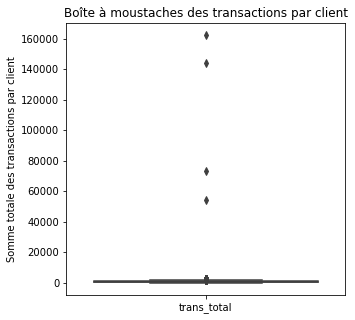

In [24]:
fig = plt.figure(figsize=(5,5))
tran_client = sns.boxplot(data=trans_total_client)
plt.title("Boîte à moustaches des transactions par client")
plt.ylabel("Somme totale des transactions par client")
plt.savefig('boxplot1.png');

In [25]:
trans_total_client.describe()

,trans_total
count,8600.000000
mean,674.020671
std,2565.848732
min,4.150000
25%,275.765000
50%,501.310000
75%,870.650000
max,162007.340000


In [26]:
trans_total_client = trans_total_client.sort_values(by=['trans_total'], ascending=False)
trans_total_client.head(10)

,trans_total
client_id,
c_1609,162007.34
c_4958,144257.21
c_6714,73197.34
c_3454,54442.92
c_7959,2564.25
c_4491,2540.53
c_8026,2537.67
c_2140,2527.01
c_8392,2515.98


In [27]:
#Supprimer les quatre clients avec des achats hyper-élevés
trans_total_client_co = trans_total_client.drop(['c_1609','c_4958','c_6714', 'c_3454'])
trans_total_client_co.head()

,trans_total
client_id,
c_7959,2564.25
c_4491,2540.53
c_8026,2537.67
c_2140,2527.01
c_8392,2515.98


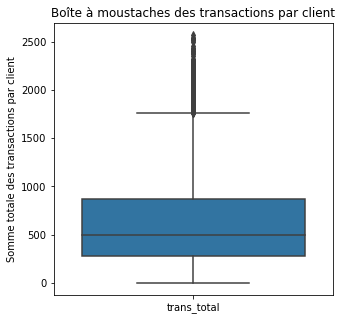

In [28]:
fig = plt.figure(figsize=(5,5))
tran_client_co = sns.boxplot(data=trans_total_client_co)
plt.title("Boîte à moustaches des transactions par client")
plt.ylabel('Somme totale des transactions par client')
plt.savefig('boxplot2.png');

In [29]:
#Supprimez ces quatre clients de la base de données principale
cls_to_drop = ['c_1609','c_4958','c_6714','c_3454']
for cl in cls_to_drop:
    data.drop(data[data['client_id'] == cl].index, inplace=True)
data.head()

,id_prod,date,session_id,client_id,sex,birth,age,price,categ,yyyy,mm,dd,hh,day
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,45,4.99,0,2021,4,10,18,5
1,0_1483,2021-12-27 11:11:12.123067,s_140787,c_5433,f,1981,41,4.99,0,2021,12,27,11,0
2,0_1483,2021-10-27 04:56:38.293970,s_110736,c_857,m,1985,37,4.99,0,2021,10,27,4,2
3,0_1483,2021-07-04 06:43:45.676567,s_57626,c_3679,f,1989,33,4.99,0,2021,7,4,6,6
23,0_1483,2021-11-13 02:04:21.760392,s_118789,c_868,m,1975,47,4.99,0,2021,11,13,2,5


In [30]:
data.to_csv("data_ventes.csv", index = False)